# Линейная регрессия

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np

bikes = pd.read_pickle('BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [4]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()

bikes_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)

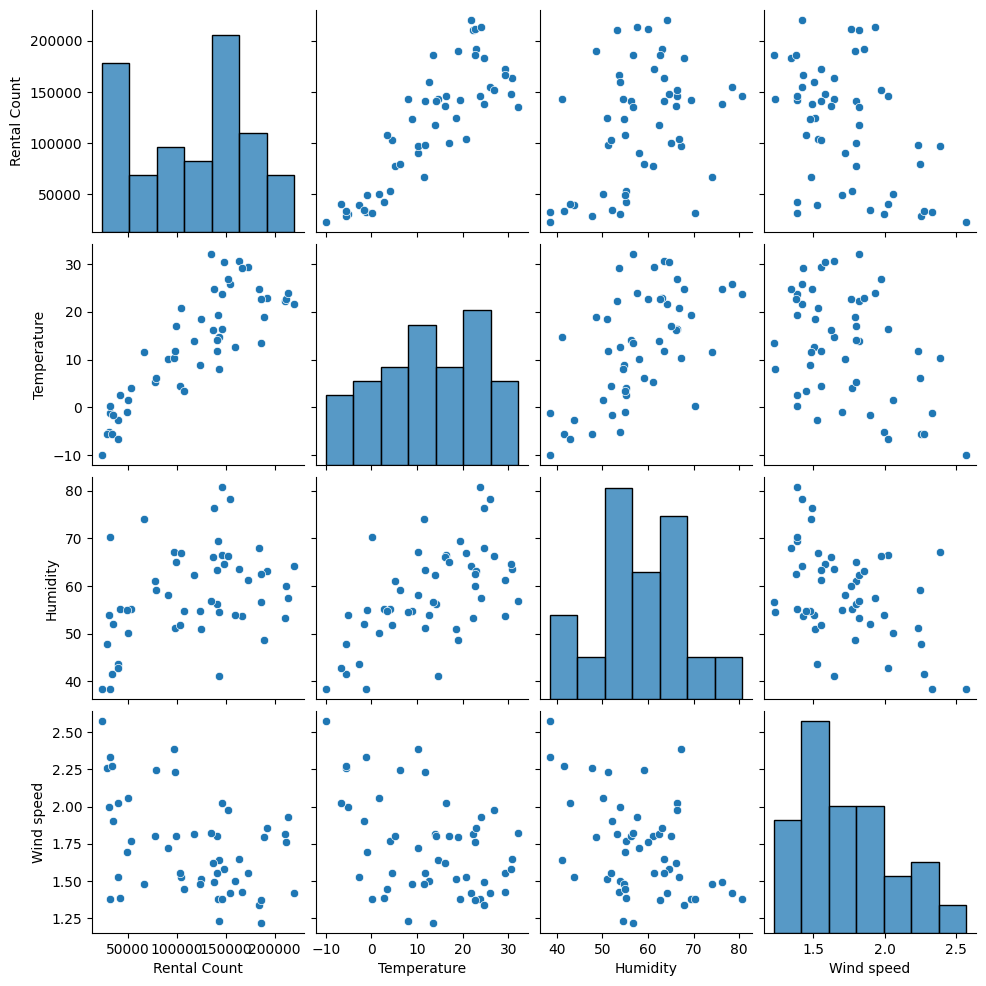

In [3]:
sns.pairplot(bikes_weeks)

In [5]:
X = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=4309.320603391841, intercept=61741.699243285024, rvalue=0.8458075200534889, pvalue=2.992184317240584e-15, stderr=384.39441030665824, intercept_stderr=6596.057490467339)


In [6]:
r_sq = res.rvalue ** 2
print(r_sq)

0.7153903609790331


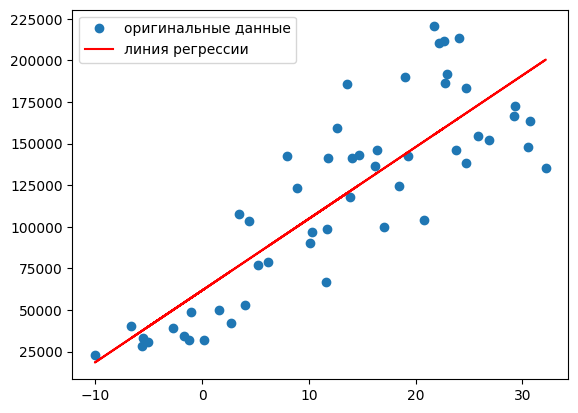

In [10]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [14]:
X_simple = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']
X_simple_constant = sm.add_constant(X_simple)
mod = sm.OLS(y, X_simple_constant)
res_simple = mod.fit()
res_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Rental Count   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           2.99e-15
Time:                        04:42:01   Log-Likelihood:                -611.13
No. Observations:                  52   AIC:                             1226.
Df Residuals:                      50   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.174e+04   6596.057      9.360      0.000    4.85e+04     7.5e+04
Temperature  4309.3206    384.394     11.211      0.000    3537.242    5081.399
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.894
Skew:                           0.369   Prob(JB):                        0.388
Kurtosis:                       2.425   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_mult = bikes_weeks.drop('Rental Count', axis=1)
y = bikes_weeks['Rental Count']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
res_mult.summary()

week
1      39441
2      30871
3      42193
4      23079
5      28415
6      33259
7      32139
8      50136
9      52958
10     77316
11     90547
12     79109
13    118031
14     97000
15     98468
16    142918
17    141147
18    146127
19    136607
20    142346
21    189749
22    210326
23    211869
24    220392
25    213553
26    146455
27    183652
28    154848
29    172636
30    163447
31    135086
32    147911
33    166679
34    152282
35    138529
36    191800
37    186208
38    103925
39    124820
40     99622
41    159527
42    185695
43    141509
44    123557
45     66682
46    142787
47    103454
48    107727
49     48680
50     40147
51     31938
52     34460
Name: Rental Count, dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Rental Count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     47.63
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.99e-14
Time:                        05:04:33   Log-Likelihood:                -607.91
No. Observations:                  52   AIC:                             1224.
Df Residuals:                      48   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.756e+05   4.61e+04      3.807      0.000    8.29e+04    2.68e+05
Temperature  4606.1894    465.195      9.902      0.000    3670.853    5541.526
Humidity    -1228.9486    555.006     -2.214      0.032   -2344.862    -113.035
Wind speed  -2.675e+04    1.5e+04     -1.779      0.082    -5.7e+04    3491.505
==============================================================================
Omnibus:                        0.375   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.542
Skew:                           0.073   Prob(JB):                        0.762
Kurtosis:                       2.521   Cond. No.                         694.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

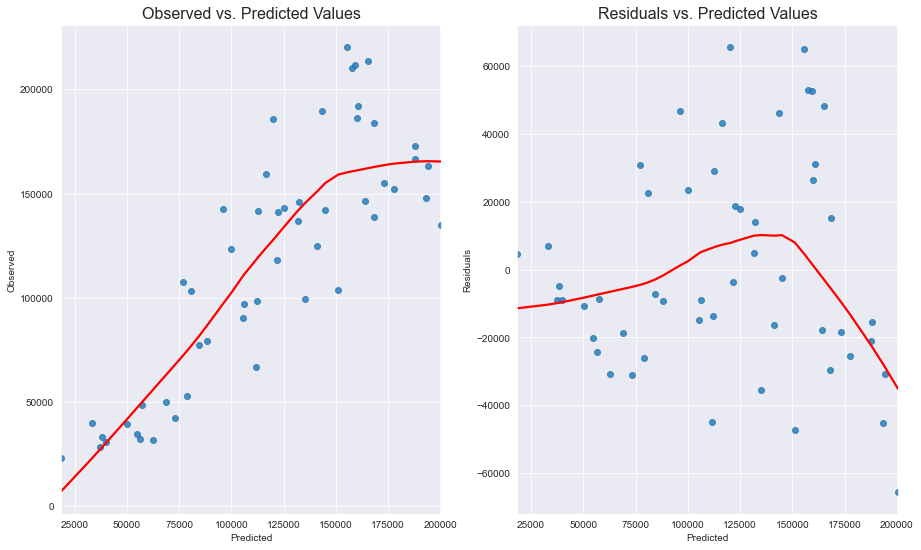

In [ ]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

linearity_test(res_simple, y)

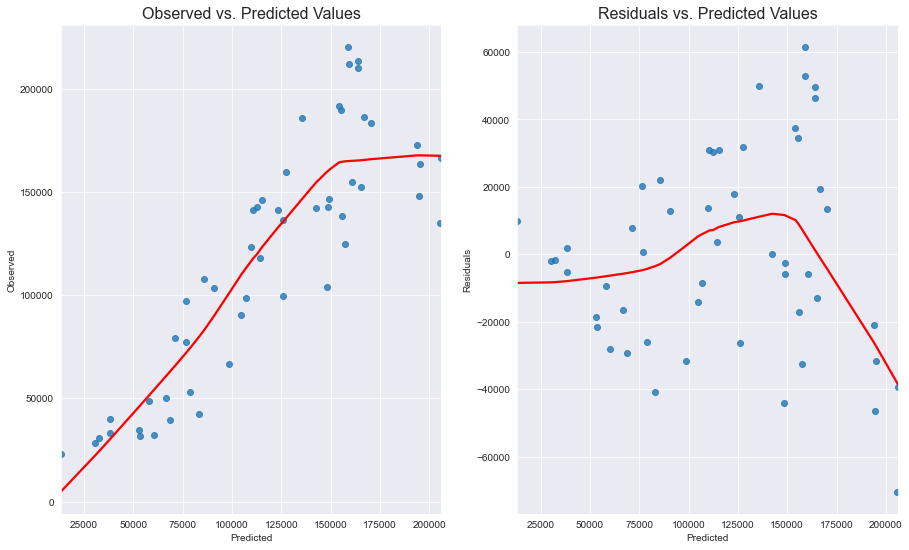

In [ ]:
linearity_test(res_mult, y)